# Pub - G Data Analysis


# About The Dataset:
DBNOs - Number of enemy players knocked.

assists - Number of enemy players this player damaged that were killed by teammates.

boosts - Number of boost items used.

damageDealt - Total damage dealt. Note: Self inflicted damage is subtracted.

headshotKills - Number of enemy players killed with headshots.

heals - Number of healing items used.

Id - Player’s Id

killPlace - Ranking in match of number of enemy players killed.

killPoints - Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.

killStreaks - Max number of enemy players killed in a short amount of time.

kills - Number of enemy players killed.

longestKill - Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.

matchDuration - Duration of match in seconds.

matchId - ID to identify match. There are no matches that are in both the training and testing set.

matchType - String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.

rankPoints - Elo-like ranking of player. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes place of “None”.

revives - Number of times this player revived teammates.

rideDistance - Total distance traveled in vehicles measured in meters.

roadKills - Number of kills while in a vehicle.

swimDistance - Total distance traveled by swimming measured in meters.

teamKills - Number of times this player killed a teammate.

vehicleDestroys - Number of vehicles destroyed.

walkDistance - Total distance traveled on foot measured in meters.

weaponsAcquired - Number of weapons picked up.

winPoints - Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.

groupId - ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.

numGroups - Number of groups we have data for in the match.

maxPlace - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.

winPlacePerc - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.

# Dataset Collection

 the data set has been collected from kaggle(https://www.kaggle.com/competitions/pubg-finish-placement-prediction/data)

# About- Project

In a PUBG game, up to 100 players start in each match (matchId). Players can be on teams (groupId) which get ranked at the end of the game (winPlacePerc) based on how many other teams are still alive when they are eliminated. In game, players can pick up different munitions, revive downed-but-not-out (knocked) teammates, drive vehicles, swim, run, shoot, and experience all of the consequences -- such as falling too far or running themselves over and eliminating themselves.

I have provided with a large number of anonymized PUBG game stats, formatted so that each row contains one player's post-game stats. The data comes from matches of all types: solos, duos, squads, and custom; there is no guarantee of there being 100 players per match, nor at most 4 player per group.

I will analyse the relationship between the different features.I will do the graphical representation and visualisation of data using matplotlib and seaborn library in python helps us to easily understand a lot better about the dataset.create 10 most useful columns as per my knowledge that will be useful to predict the final position of a player.


# installing Libraries 
 numpy for numerical operations , pandas for  dataset reading , matplotlib.pyplot & seaborn for data visualization

In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Uploading the notebook

In [5]:
#uploading the dataset
train=pd.read_csv("C:/Users/Akash/Desktop/data1.csv")

# DATA PREPARATION & CLEANING

 Let's gather some informations about our data

In [3]:
#collecting information about the data 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

We got a very big data set (appx 4446966 entries) 

In [4]:
# checking the top 5 rows 
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


# Checking for null values

In [5]:
train.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

But we can see that the data is very clean.

# Exploration & Visualizing

# Q. A average person kills ?

In [6]:
print("the avg person kills {:4f} players ". format (train['kills'].mean()))

the avg person kills 0.924783 players 


# Q. How much 99% of people kills ?

In [7]:
print("99% of people have {} kil ls or less". format (train['kills'].quantile(0.99)))

99% of people have 7.0 kills or less


# Q. Highest number of kills?

In [8]:
print ("the most kills ever recorded is {}.". format (train['kills'].max()))

the most kills ever recorded is 72.


# visualization for killing data

we will just see the analysis of kill records between 0-8 becase 99% ids has less than 7 kills & there are many numbers over 8 ( maximum kill is 72. All the numbers above 8 are shown as 8+.

C:\Users\Akash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


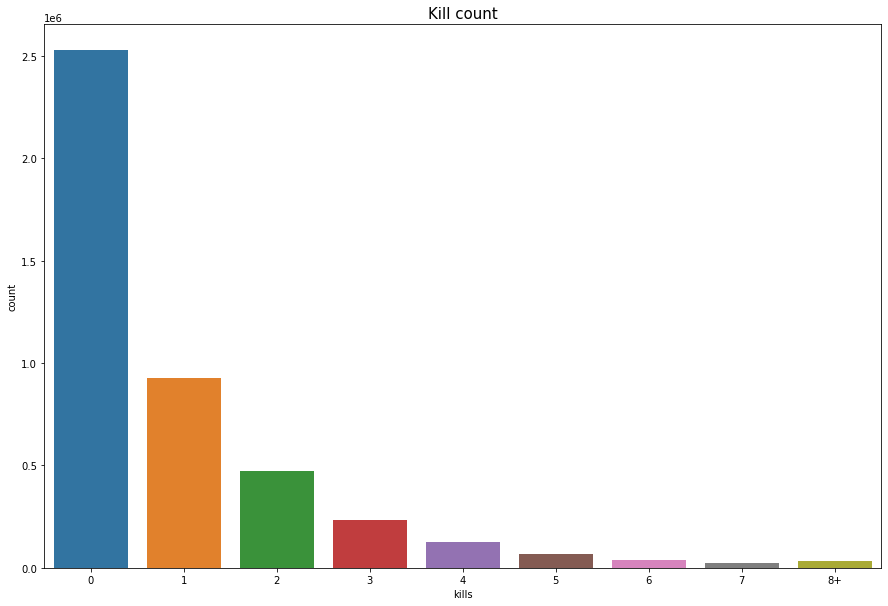

In [9]:
data=train.copy()
data.loc[data['kills']>data['kills'].quantile(0.99)]='8+'
plt.figure(figsize=(15,10))
sns.countplot(data['kills'].astype('str').sort_values())
plt.title("Kill count",fontsize=15)
plt.show()

# Q. let's see most people can't make a single kill . atleast do they do damage ?

C:\Users\Akash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


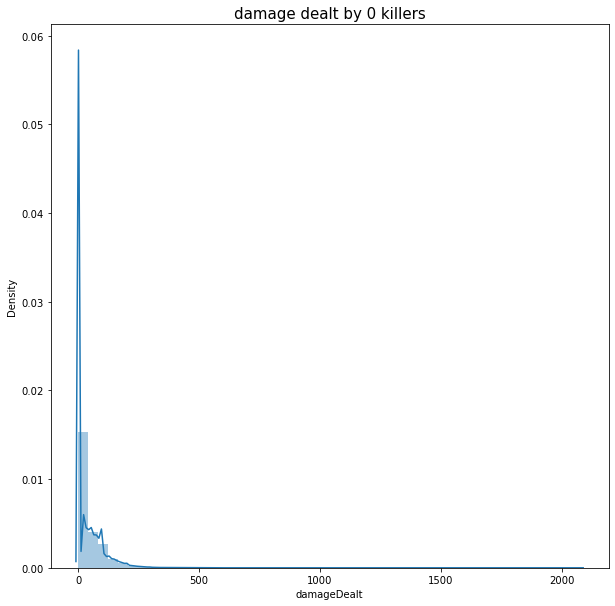

In [10]:
data=train.copy()
data=data[data['kills']==0]
plt.figure(figsize=(10,10))
plt.title("damage dealt by 0 killers",fontsize=15)
sns.distplot(data['damageDealt'])
plt.show()

well , most of them don't . let's investigate the exceptions.

# Q. how many players have won the game without a single kill?

In [11]:
print("{} players have won without a single kill!". format(len(data[data['winPlacePerc']==1])))

16666 players have won without a single kill!


# Q. How many players have won without dealing damage? 

In [12]:
data1=train[train['damageDealt']==0].copy()
print("{} players have won without dealing damage!".format (len(data1[data1['winPlacePerc']==1])))

4770 players have won without dealing damage!


#  visualizing win placement percentage vs kills

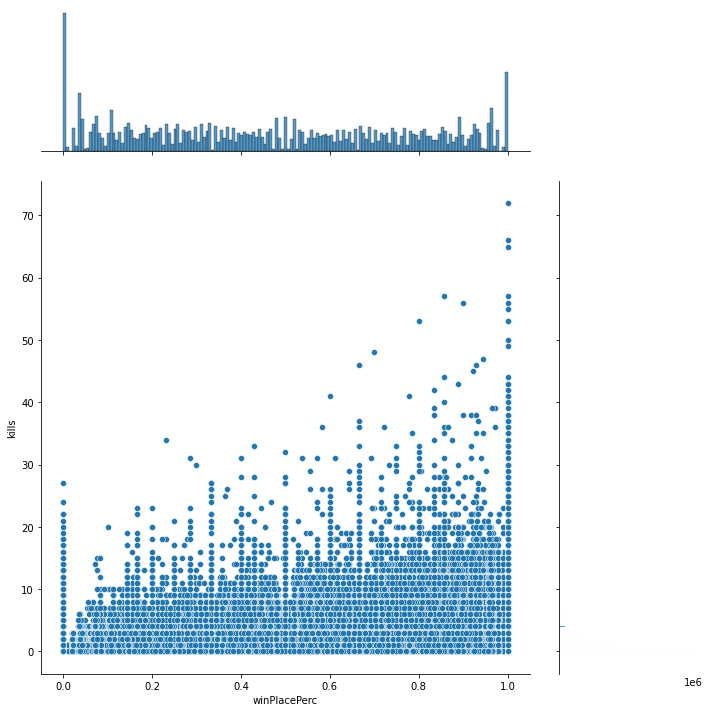

In [13]:
sns.jointplot(x="winPlacePerc",y="kills",data=train,height=10,ratio=3)
plt.show()

# Q. Does killing has any relation with final placement?

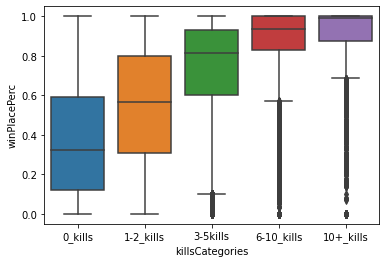

In [14]:
kills=train.copy()
kills['killsCategories']=pd.cut(kills['kills'],
                                [-1,0,2,5,10,60],
                                labels=['0_kills','1-2_kills','3-5kills','6-10_kills','10+_kills'])
sns.boxplot(x="killsCategories", y="winPlacePerc",data=kills)
plt.show()

Apperently killing has a correlation with winning .Finally lt's group players based on kills (0 kills,1-2 kills, 3-5 kills,6-10 kills & 10+ kills

# walks

# Q. Average walking distance of a person ?

In [15]:
print ("a avg person walks for {:.1f}m.".format(train['walkDistance'].mean()))

a avg person walks for 1154.2m.


# Q. how much does the 99% of people walk ?

In [16]:
print("99% of people have walked {}m or less.". format(train['walkDistance'].quantile(0.99)))

99% of people have walked 4396.0m or less.


# Q. Maximum walking distance recorded ?

In [17]:
print("the marathon champion walked for {}m".format(train['walkDistance'].max()))

the marathon champion walked for 25780.0m


# Visualization the walking data 

C:\Users\Akash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

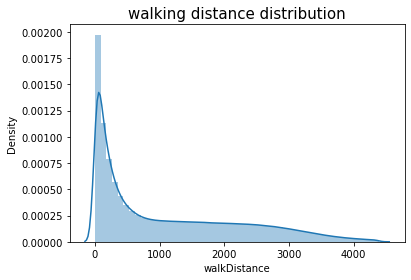

In [18]:
data=train.copy()
data=data[data['walkDistance']<train['walkDistance'].quantile(0.99)]
plt.title("walking distance distribution",fontsize=15)
sns.distplot(data['walkDistance'])
plt.show


# Q. how many players have died before walking a single step ?

In [19]:
print("{} players walked 0 meters.".format(len(data[data['walkDistance']==0])))
print("this means that they die before even taking a step.")

99603 players walked 0 meters.
this means that they die before even taking a step.


# Q. Do walking has any correlation with win place?

# Visualizing the walking 

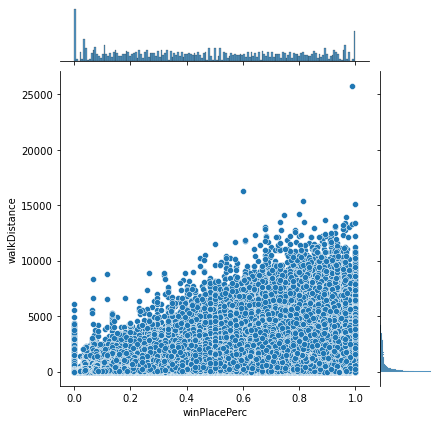

In [20]:
sns.jointplot(x="winPlacePerc",y="walkDistance",data=train)
plt.show()

 apperently walking has a high correlation with win place

# Drivers

# Q. How much a average person drives ?
# Q. how much 99% of people in the game drive ?
# Q. Maximum driving distance recorded ?

In [21]:
print("the avg person drives for {}m.".format(train['rideDistance'].mean()))
print("99% of people have drived {}m. or less.".format(train['rideDistance'].quantile(0.99)))
print("the formula 1 champion drived for {}m.".format(train['rideDistance'].max()))

the avg person drives for 606.115669154093m.
99% of people have drived 6966.0m. or less.
the formula 1 champion drived for 40710.0m.


# Q. How many players have drived 0 meters ?

In [23]:
print("{} players drived for 0 meters.".format(len(data[data['rideDistance']==0])))

3309429 players drived for 0 meters.


# Q. Do there is any correlation between riding & winning place 
# Q. Visualizing the the plot of riding data

C:\Users\Akash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


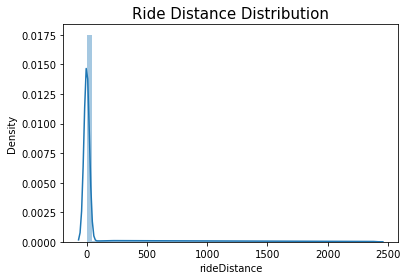

In [22]:
data=train.copy()
data=data[data['rideDistance']<train['rideDistance'].quantile(0.9)]
plt.title("Ride Distance Distribution",fontsize=15)
sns.distplot(data['rideDistance'])
plt.show()

 it seems that this 2 variables are slightly correlated 

# Q. Do destroying a vehicle have any relation with winning ?. 
# in this case I am using point plot because this data has some limited values.

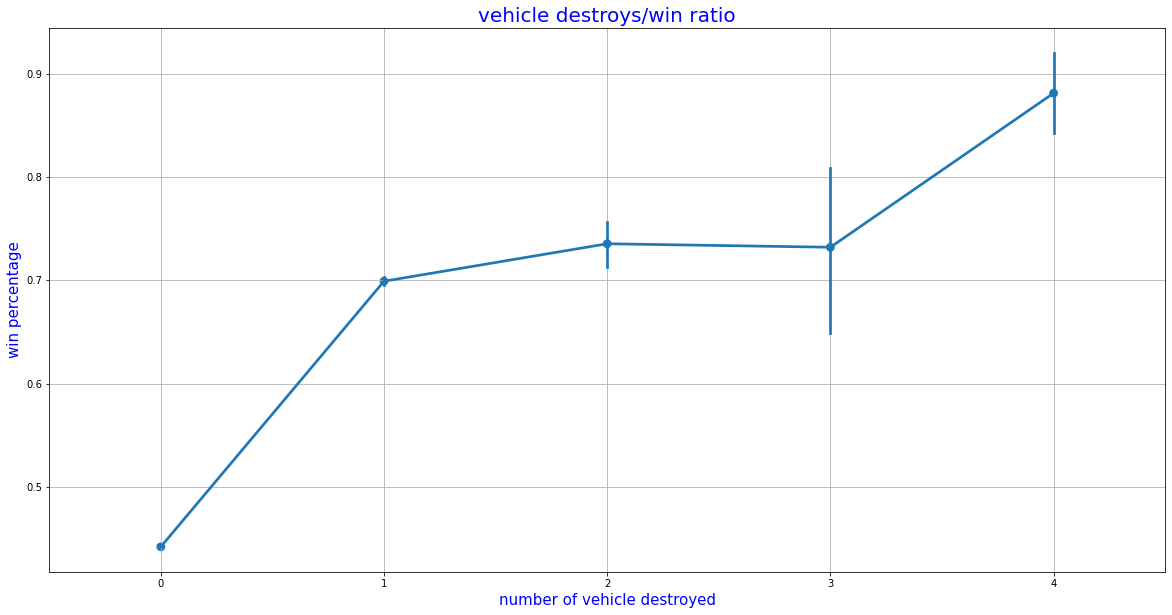

In [24]:
f,ax1=plt.subplots(figsize=(20,10))
sns.pointplot(x='vehicleDestroys',y='winPlacePerc',data=data)
plt.xlabel('number of vehicle destroyed',fontsize=15,color='blue')
plt.ylabel('win percentage',fontsize=15,color='blue')
plt.title('vehicle destroys/win ratio',fontsize=20,color='blue')
plt.grid()
plt.show()

yes destoying a vehicle increases your chance of winning

#  Swimmers

# Q.How much a average person swims ?
# Q.how much 99% of people in the game swim ?
# Q. Maximum swimming distance recorded ?

In [25]:
print("the avg person swims for {}m.".format(train['swimDistance'].mean()))
print("99% of people have swimmed {}m or less.".format(train['swimDistance'].quantile(0.99)))
print("the olympic champion swimmed for {}m.".format(train['swimDistance'].max()))

the avg person swims for 4.509322451307243m.
99% of people have swimmed 123.0m or less.
the olympic champion swimmed for 3823.0m.


# Visualizing the the swimming distance  in 95% quartile

C:\Users\Akash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


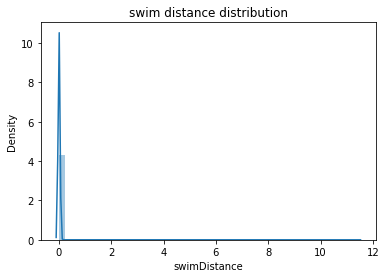

In [26]:
data=train.copy()
data=data[data['swimDistance']<train['swimDistance'].quantile(0.95)]
plt.figure
plt.title("swim distance distribution")
sns.distplot(data['swimDistance'])
plt.show()

 almost no one swims . let's group the swimming distances in 4 categories and plot vs winPlacePerc 

# Visualizing the the  swimming data in group format

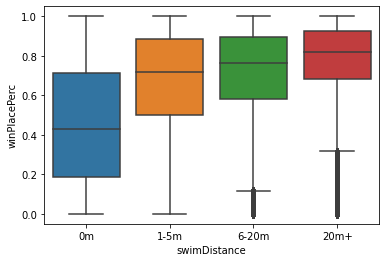

In [27]:
swim=train.copy()
swim['swimDistance']=pd.cut(swim['swimDistance'],
                             [-1,0,5,20,5286],
                             labels=['0m','1-5m','6-20m','20m+'])
plt.figure
sns.boxplot(x="swimDistance",y="winPlacePerc",data=swim)
plt.show()


 it seems that if you swim. you rise to the top. the pubg there are currently 3 maps . one of them has almost no water. keep that in mind . we might plan on doing analysis to find out in which map a match is played.

# Healers

# Q. How many a average person use heal items ?
# Q. how many 99% of people in the game use healing?
# Q. Maximum healing done?

In [6]:
# print("the avg person uses {} heal items.". format(train['heals'].mean()))
print("99% of people use {} or less heals.".format(train['heals'].quantile(0.99)))
print("the max heals used {}.".format(train['heals'].max()))

99% of people use 12.0 or less heals.
the max heals used 80.


# Q. How many a average person use boost items ?
# Q. how many 99% of people in the game use boosts?
# Q. Maximum boosting done?

In [29]:
print("the avg person uses {} boosts items.".format(train["boosts"].mean()))
print("99% of people use {} or less boosts.".format(train['boosts'].quantile(0.99)))
print("the max boosts used {}.".format(train['boosts'].max()))

the avg person uses 1.1069077209045448 boosts items.
99% of people use 7.0 or less boosts.
the max boosts used 33.


# Visualizing the boosts & heals with wining place plot 

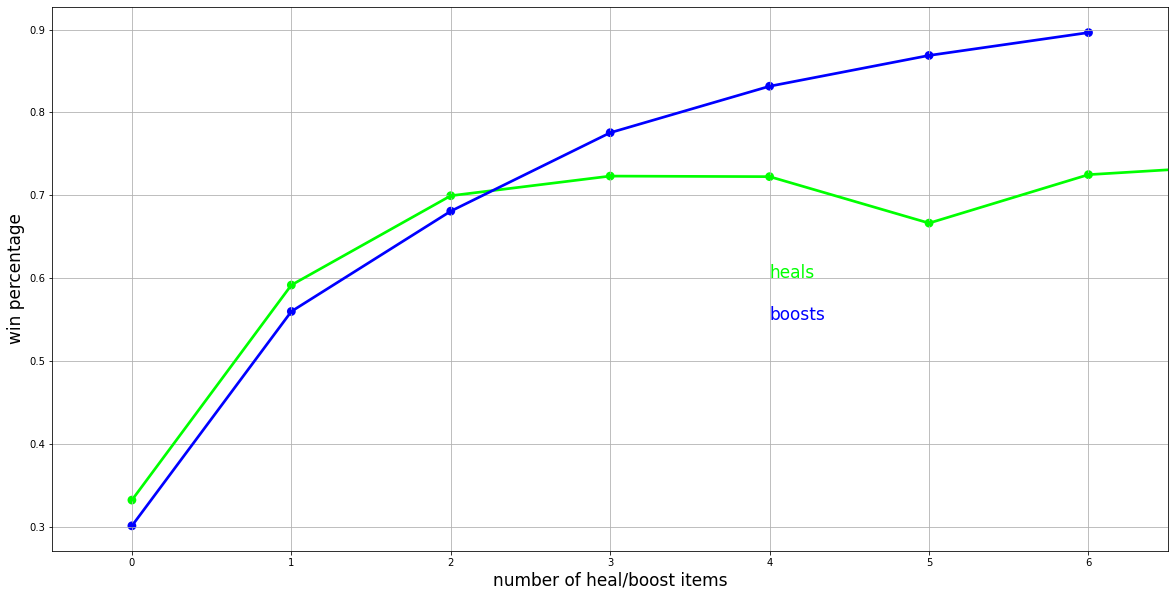

In [30]:
data=train.copy()
data=data[data['heals']<data['heals'].quantile(0.99)]
data=data[data['boosts']<data['boosts'].quantile(0.99)]
f,ax1=plt.subplots(figsize=(20,10))
sns.pointplot(x='heals',y='winPlacePerc',data=data,color='lime',alpha=0.8)
sns.pointplot(x='boosts',y='winPlacePerc',data=data,color='blue',alpha=0.8)
plt.text(4,0.6,'heals',color='lime',fontsize=17)
plt.text(4,0.55,'boosts',color='blue',fontsize=17)
plt.xlabel('number of heal/boost items',fontsize=17)
plt.ylabel('win percentage',fontsize=17)
plt.grid()
plt.show()

# Visualizing healing with win place 

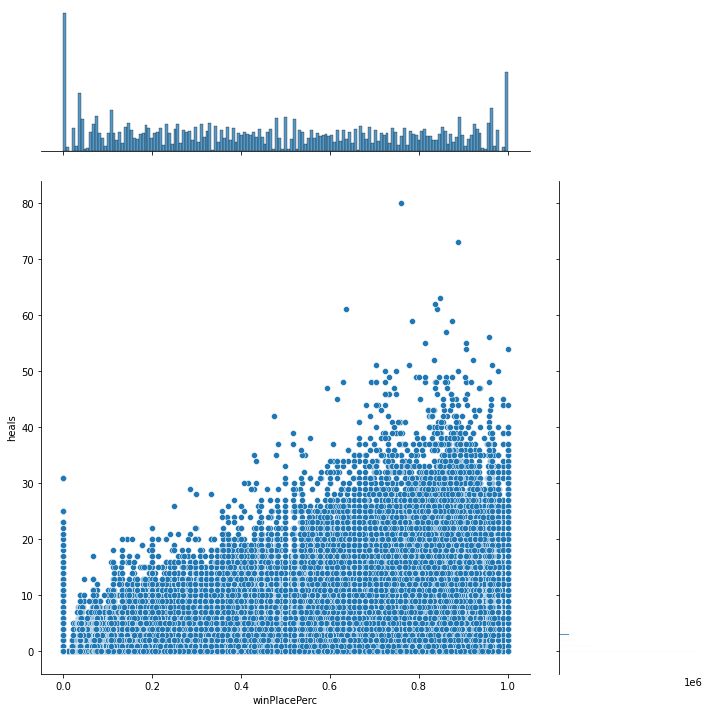

In [31]:
sns.jointplot(x="winPlacePerc",y="heals",data=train, height=10,ratio=3)
plt.show()

# Visualizing boosting with win place 

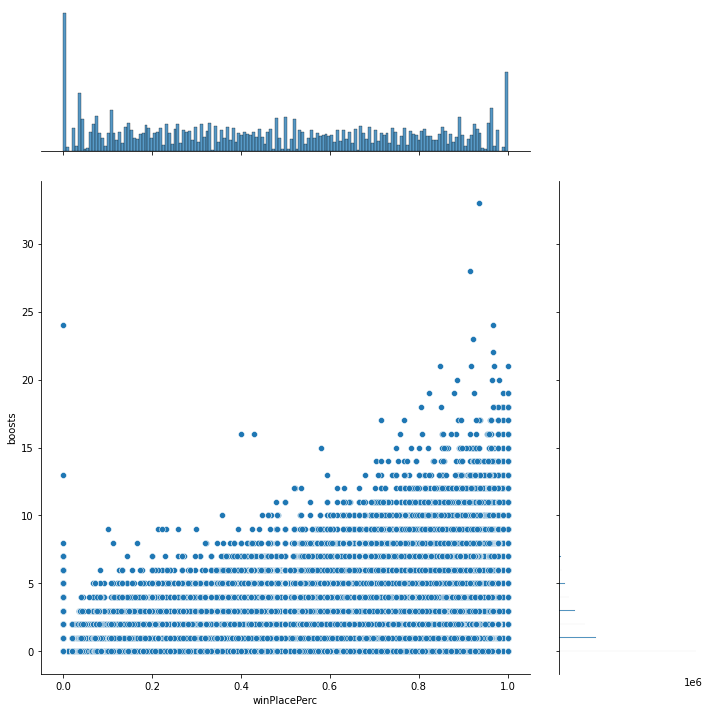

In [35]:
sns.jointplot(x="winPlacePerc",y="boosts",data=train, height=10 ,ratio=3)
plt.show()

 so healing and boosting are definitely correlated with winplaceperce.boosting is more correlated. in every plot, there is as abnormal behavior when calues are 0

# representing the data between Duos , Solos & Squads

there are 3 game modes in the game . one can play solo , or with a friend ,duo, or with 3 other friends , squad, 100 players join the same server , so in the case of duos the max teams are 50 and in case of squads the max teams are 25.

In [36]:
s=train[train['numGroups']>50]
d=train[(train['numGroups']>25) & (train['numGroups']<=50)]
sq=train[train['numGroups']<=25]

# Q. Percentage of Solo games in the data ?
# Q. percentage of duo games in the data?
# Q. percentage of squad games in the data ?

In [37]:
print("there are {} ({}%) solo games.".format(len(s),100*len(s)/len(train)))
print("there are {} ({}%) duo games.".format(len(d),100*len(d)/len(train)))
print("there are {} ({}%) squad gmaes.". format(len(sq),100*len(s)/len(train)))

there are 709111 (15.945950564946978%) solo games.
there are 3295326 (74.10279278051597%) duo games.
there are 442529 (15.945950564946978%) squad gmaes.


# Visualizing the solo-duo-squad killing data with winning place data 

C:\Users\Akash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


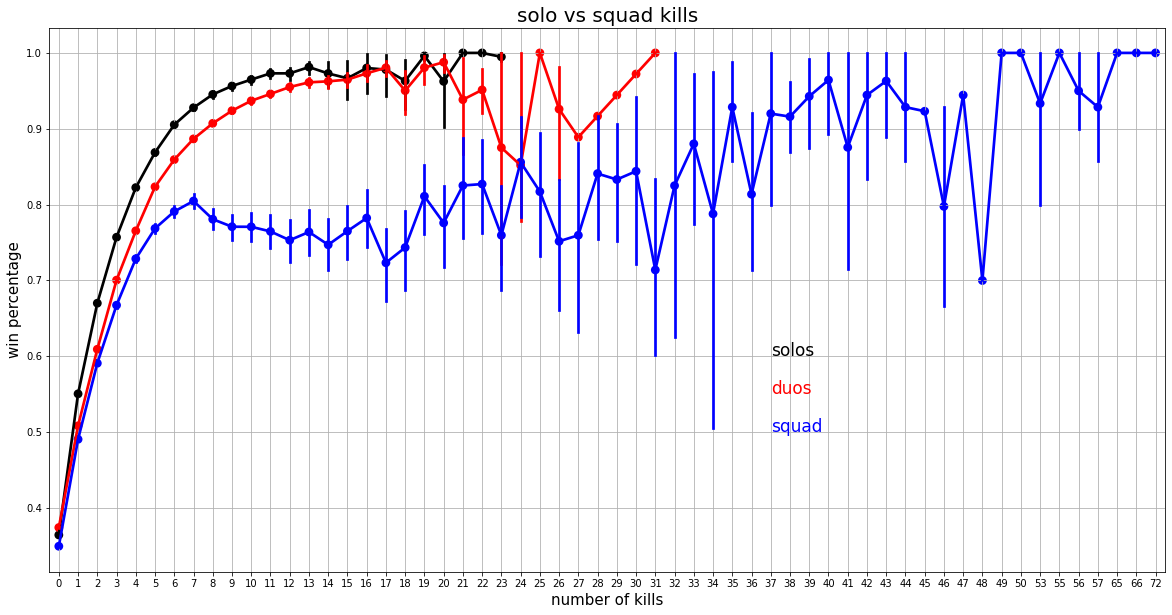

In [38]:
f,ax1=plt.subplots(figsize=(20,10))
sns.pointplot('kills',y='winPlacePerc',data=s, color='black',alpha=0.8)
sns.pointplot(x='kills',y='winPlacePerc',data=d,color='red',alpha=0.8)
sns.pointplot(x='kills',y='winPlacePerc',data=sq,color='blue',alpha=0.8)
plt.text(37,0.6,'solos',color='black',fontsize=17)
plt.text(37,0.55,'duos',color='red',fontsize=17)
plt.text(37,0.5,'squad',color='blue',fontsize=17)
plt.xlabel('number of kills',fontsize=15)
plt.ylabel('win percentage',fontsize=15)
plt.title('solo vs squad kills', fontsize=20)
plt.grid()
plt.show()

solos and duoes behave the same, but when playing squads kills don't matter that much.
the attribute DBNOs means enemy players knocked . A "Knock" can happen only in duos or squads.
the attribute assist can also happen only in duos pr squads. it generally means that the players had an involvement in a kill .
the attribute revive also happens in duos or squads

# Visualizing duo-squad number of players knocked , assists , revives with win place 

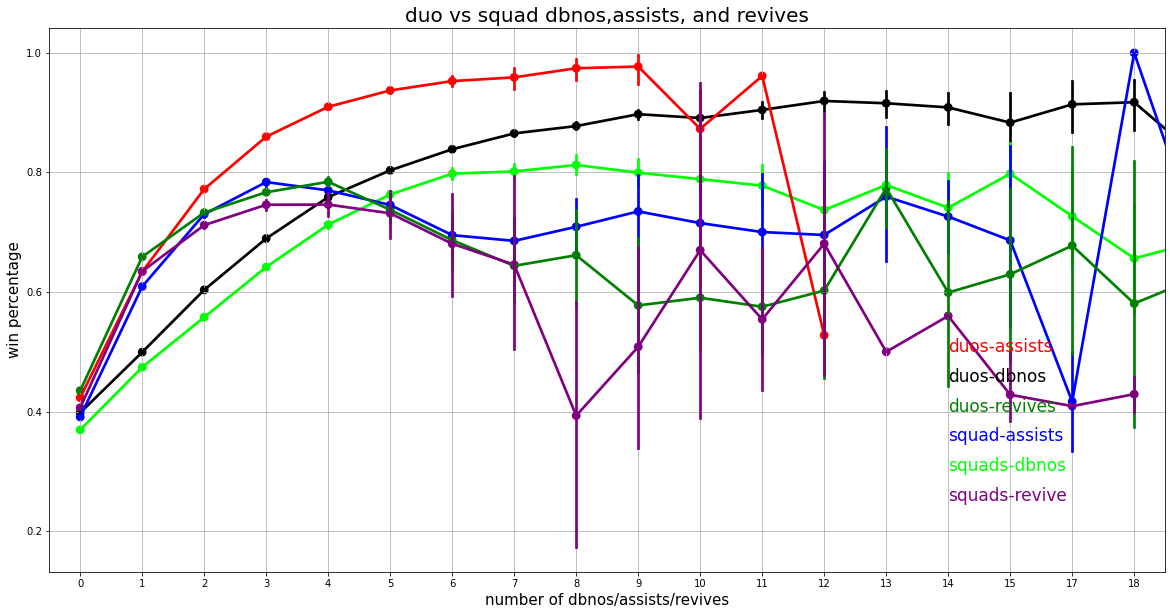

In [40]:
f,ax1=plt.subplots(figsize=(20,10))
sns.pointplot(x='DBNOs', y='winPlacePerc',data=d,color='black',alpha=0.8)
sns.pointplot(x='DBNOs', y='winPlacePerc',data=sq,color='lime',alpha=0.8)
sns.pointplot(x='assists', y='winPlacePerc',data=d,color='red',alpha=0.8)
sns.pointplot(x='assists', y='winPlacePerc',data=sq,color='blue',alpha=0.8)
sns.pointplot(x='revives', y='winPlacePerc',data=d,color='green',alpha=0.8)
sns.pointplot(x='revives', y='winPlacePerc',data=sq,color='purple',alpha=0.8)
plt.text(14,0.5,'duos-assists',color='red',fontsize=17)
plt.text(14,0.45,'duos-dbnos',color='black',fontsize=17)
plt.text(14,0.4,'duos-revives',color='green',fontsize=17)
plt.text(14,0.35,'squad-assists',color='blue',fontsize=17)
plt.text(14,0.3,'squads-dbnos',color='lime',fontsize=17)
plt.text(14,0.25,'squads-revive',color='purple',fontsize=17)
plt.xlabel('number of dbnos/assists/revives',fontsize=15)
plt.ylabel('win percentage',fontsize=15)
plt.title('duo vs squad dbnos,assists, and revives',fontsize=20)
plt.grid()
plt.show()

# Visualizing the Pearson's correlation between variables

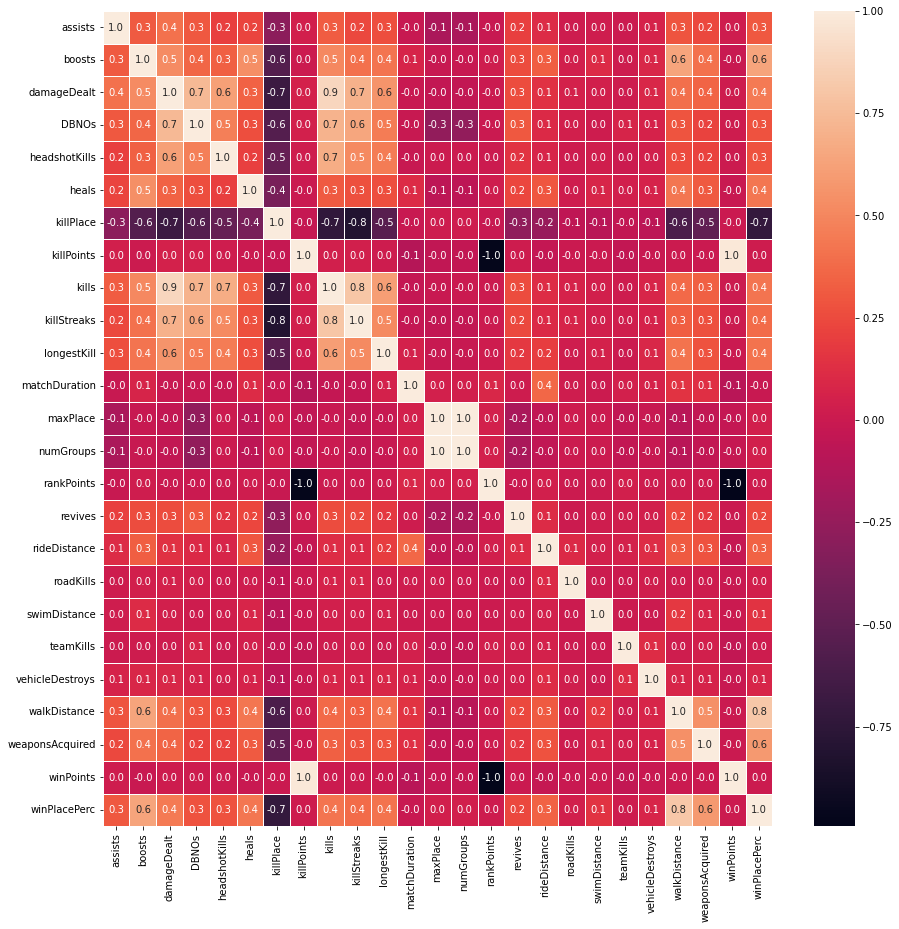

In [41]:
f,ax=plt.subplots(figsize=(15,15))
sns.heatmap(train.corr(),annot=True,linewidths=.5,fmt='.1f',ax=ax)
plt.show()

in term of the target variable (winPlacePrec), there are a few variables high medium to high correlation. the highest positive correlation is walkDistance and the highest negetive the killplace

# Visualizing the top 5 most positive correlated variables with the target

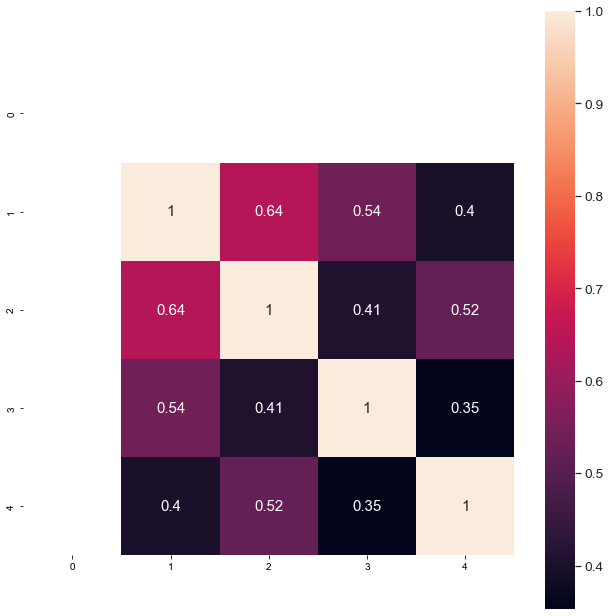

In [42]:
k=5
f,ax=plt.subplots(figsize=(11,11))
cols=train.corr().nlargest(k,'winPlacePerc')['winPlacePerc'].index
cm=np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm=sns.heatmap(cm,cbar=True,annot=True,square=True)
plt.show()

# Visualizing the top 5 variables and target variable as pair plot

C:\Users\Akash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


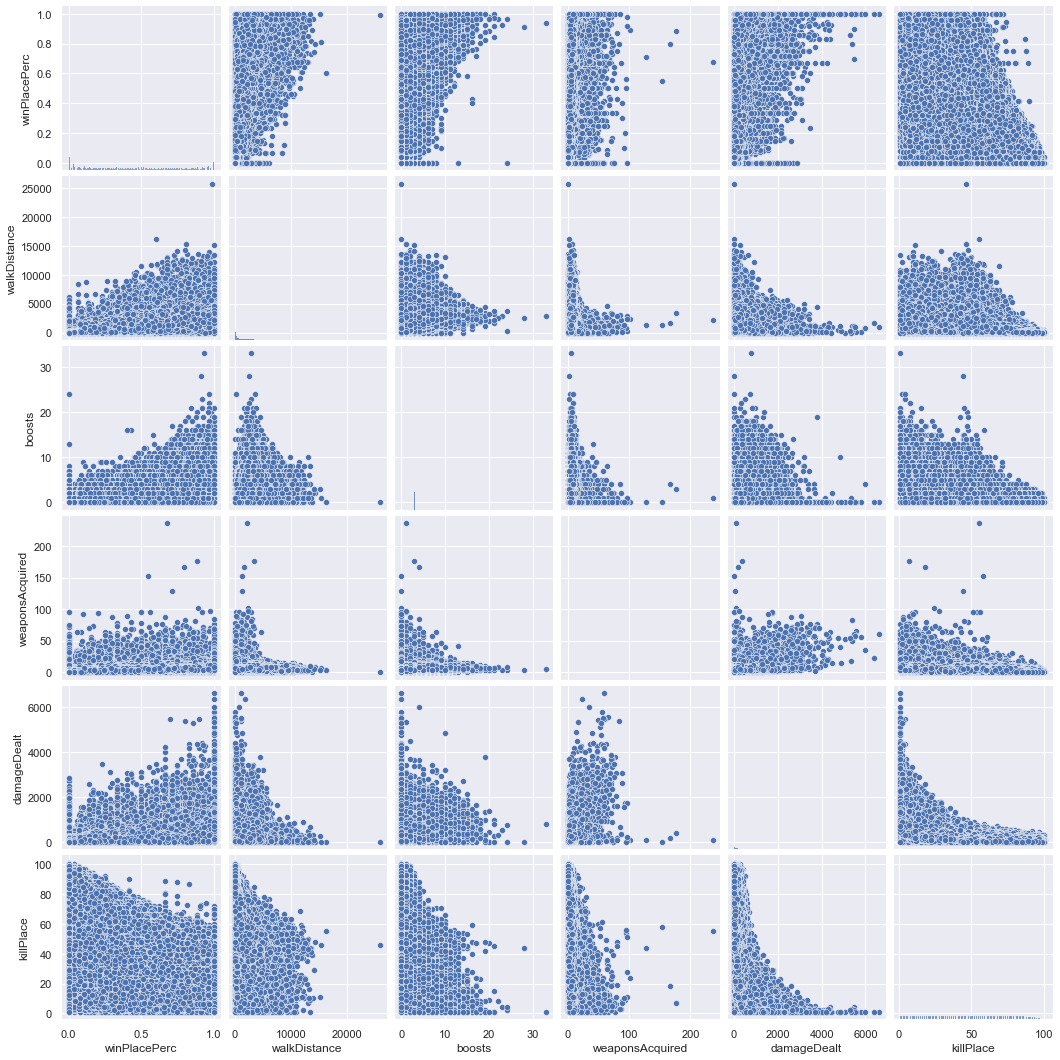

In [43]:
sns.set()
cols=['winPlacePerc','walkDistance','boosts','weaponsAcquired','damageDealt','killPlace']
sns.pairplot(train[cols],size=2.5)
plt.show()

In this plot you can see all the infernce between the given datas

# Feature Engineering

A game in pubg can have upto 100 players fighting . But most of the times a game isn't full. there is no variable that give us the number of players joined . So let's creat one 

In [44]:
train['playersJoined']=train.groupby('matchId')['matchId'].transform('count')

# Visualizing the game ratio where more than 49 players have joined

C:\Users\Akash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


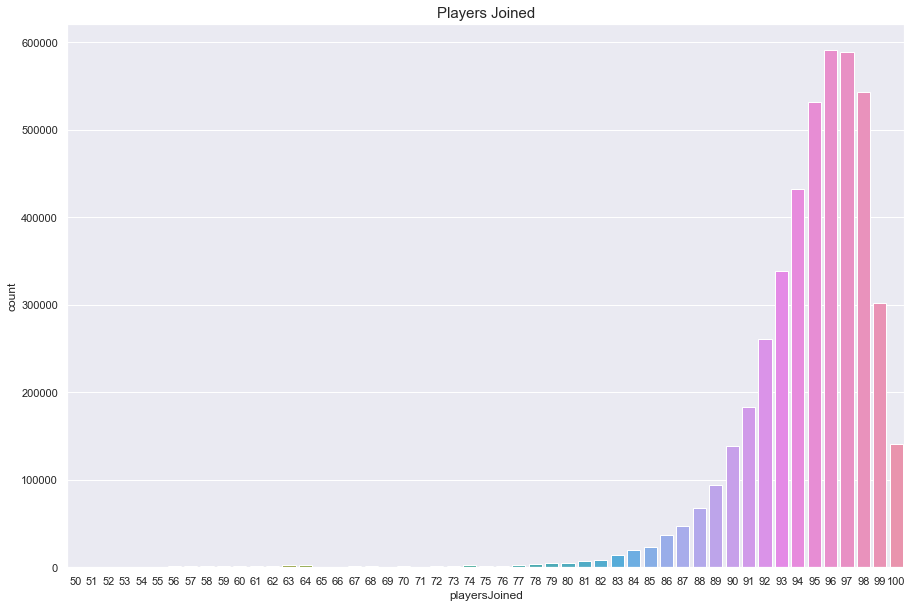

In [45]:
data=train.copy()
data = data [data['playersJoined']>49]
plt.figure(figsize=(15,10))
sns.countplot(data['playersJoined'])
plt.title("Players Joined",fontsize=15)
plt.show()

Based On The "playersjoined" feature we can creat (or change) a lot of others to normalize their values. For example I will creat the "killsNorm" and "damagedealtNorm" features.When there are 100 plahyers in the game it might be easier to find and kill someone , when ther are 90 players,So I will Normalize the kills in a way that a kill in 100 players  will score 1 (as it is) and in 90 players it will score (100-90)/100+1=1.1 . This is just an assumption .You can use different sacles .

# Creating some new column which can help us to analyze the final placement prediction 

In [46]:
train['killsNorm']=train['kills']*((100-train['playersJoined'])/100+1)
train['damageDealtNorm']=train['damageDealt']*((100-train['playersJoined'])/100+1)
train[['playersJoined','kills','killsNorm','damageDealt','damageDealtNorm']][5:8]

,playersJoined,kills,killsNorm,damageDealt,damageDealtNorm
5,95,1,1.05,100.000,105.00000
6,97,0,0.00,0.000,0.00000
7,96,0,0.00,8.538,8.87952


Another simple feature is the sum  of heals and boosts . Also the sum of total distance travelled.

In [47]:
train['healsAndBoosts']=train['heals']+train['boosts']
train['totalDistance']=train['walkDistance']+train['rideDistance']+train['swimDistance']

When using boosting items you rum faster .They also help staying out of the zone .so let creat a feature boosts per walking distance .Heals don't make you run faster , but they also help staying out of the zone and ;oot more . so lets creat the same feature for heals also.

In [48]:
#the +1 is to avoid infinity , because there are entries where boosts >0
# & the walk distance =0 
train['boostsPerWalkDistance']=train['boosts']/(train['walkDistance']+1)
train['boostsPerWalkDistance'].fillna(0,inplace=True)

In [49]:
#the +1 is to avoid infinity . because there are entries 
#where heals>0 and walkDistance=0
train ['healsPerWalkDistance']=train['heals']/(train['walkDistance']+1)
train['healsPerWalkDistance'].fillna(0,inplace=True)

# visualizing the new table

In [52]:
#the +1 is to avoid infinity
train['healsAndBoostsPerWalkDistace']=train['healsAndBoosts']/(train['walkDistance']+1)
train['healsAndBoostsPerWalkDistace'].fillna(0,inplace=True)

train[['walkDistance','boosts','boostsPerWalkDistance','heals','healsPerWalkDistance','healsAndBoosts']][5:20]

,walkDistance,boosts,boostsPerWalkDistance,heals,healsPerWalkDistance,healsAndBoosts
5,34.70,0,0.000000,0,0.000000,0
6,13.50,0,0.000000,0,0.000000,0
7,1089.00,0,0.000000,0,0.000000,0
8,799.90,0,0.000000,0,0.000000,0
9,65.67,0,0.000000,0,0.000000,0
10,868.30,0,0.000000,0,0.000000,0
11,451.70,0,0.000000,0,0.000000,0
12,2784.00,0,0.000000,0,0.000000,0
13,2050.00,1,0.000488,5,0.002438,6
14,1666.00,1,0.000600,2,0.001200,3


# creating the feature "killsPerWalkDistance"

In [55]:
#the +1 is to avoid infinity  because there are wntries where kills>0 and walkdistance=0 
train['killsPerWalkDistance']=train['kills']/(train['walkDistance']+1)
train['killsPerWalkDistance'].fillna(0,inplace=True)
train[['kills','walkDistance','rideDistance','killsPerWalkDistance','winPlacePerc']][5:15]

,kills,walkDistance,rideDistance,killsPerWalkDistance,winPlacePerc
5,1,34.70,0.0,0.028011,0.0370
6,0,13.50,0.0,0.000000,0.0000
7,0,1089.00,2004.0,0.000000,0.7368
8,0,799.90,0.0,0.000000,0.3704
9,0,65.67,0.0,0.000000,0.2143
10,0,868.30,0.0,0.000000,0.3929
11,0,451.70,0.0,0.000000,0.4043
12,0,2784.00,6639.0,0.000000,0.9286
13,4,2050.00,1228.0,0.001950,0.8750
14,1,1666.00,1237.0,0.000600,0.9000


0 walking distance and many kills ? also most have winPlacePerc=1. Deafinitely cheaters.

# Creating new column for solos Duos & squads .

In [56]:
train ['team']= [1 if i<50 else 2 if (i>25 & i<=50)else 4 for i in train['numGroups']]

In [57]:
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,playersJoined,killsNorm,damageDealtNorm,healsAndBoosts,totalDistance,boostsPerWalkDistance,healsPerWalkDistance,healsAndBoostsPerWalkDistace,killsPerWalkDistance,team
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,96,0.00,0.0000,0,244.8000,0.0,0.0,0.0,0.000000,1
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,91,0.00,99.7023,0,1445.0445,0.0,0.0,0.0,0.000000,1
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,98,0.00,69.3600,0,161.8000,0.0,0.0,0.0,0.000000,1
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,91,0.00,35.8610,0,202.7000,0.0,0.0,0.0,0.000000,1
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,97,1.03,103.0000,0,49.7500,0.0,0.0,0.0,0.019704,2


# Inferences and Conclusions
I've drawn many inferences from the data. Here's a summary of a few of them:

I have got a very big dataset of around 4446966 entries.

Killing- a average person kills 0.924783 players ,99% of people have 7.0 kills or less , the most kills ever recorded is 72.Most of the people in the game doesn't make a single kill in the game.16666 players have won without a single kill.4770 players have won without dealing damage.Apperently killing has a correlation with winning placement .

Walking -A average person walks for 1154.2m.99% of people have walked 4396.0m or less.the marathon champion walked for 25780.0m.99603 players walked 0 meters.this means that they die before even taking a step.apperently walking has a high correlation with win place.

Driving - The avg person drives for 606.115669154093m.99% of people have drived 6966.0m. or less.The formula 1 champion drived for 40710.0m.3309429 players drived for 0 meters.it seems that this 2 variables are slightly correlated .yes destoying a vehicle increases your chance of winning.

Swimming -The avg person swims for 4.509322451307243m.99% of people have swimmed 123.0m or less.The olympic champion swimmed for 3823.0m.it seems that if you swim. you rise to the top. the pubg there are currently 3 maps . one of them has almost no water. keep that in mind . we might plan on doing analysis to find out in which map a match is played.

Healing -The avg person uses 1.1069077209045448 boosts items.99% of people use 7.0 or less boosts.The max boosts used 33.so healing and boosting are definitely correlated with winplaceperce.boosting is more correlated. in every plot, there is as abnormal behavior when calues are

there are 3 game modes in the game . one can play solo , or with a friend ,duo, or with 3 other friends , squad, 100 players join the same server , so in the case of duos the max teams are 50 and in case of squads the max teams are 25.
there are 709111 (15.945950564946978%) solo games,there are 3295326 (74.10279278051597%) duo games,there are 442529 (15.945950564946978%) squad gmaes in the data.solos and duoes behave the same, but when playing squads kills don't matter that much.
the attribute DBNOs means enemy players knocked . A "Knock" can happen only in duos or squads.
the attribute assist can also happen only in duos pr squads. it generally means that the players had an involvement in a kill .
the attribute revive also happens in duos or squads
Win Place perc A very high correlation between this 5 features  . boosting , weapon accuaring , damage dealt , walk distance , kill place .I have created  some more features watching the scenarios of the game which has high correlation with win place perc that are "kills norm" ," damage dealt ","healsandboosts" , "totalDistanc" ,"boostsper walk distance" , "heals per walk distance" , " kills per walk distance" , "solos" ,"duos" ,"squad" & added them with the table .

Future works -
this data analysis model project can be used to  develop the game and making the game more interesting . It can also be used to 